In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import plotly.express as px
import scipy.stats as st


In [2]:
gdp_and_health_df = pd.read_csv('Resources/gdp_health_per_cap.csv')

In [3]:
# Set options to Review entire DataFrames
pd.options.display.max_rows=None

# Start with gdp per cap (ppp) & health expenditures per cap (ppp) 
gdp_and_health_df.head()

,Time,Time Code,Country Name,Country Code,"GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]","Current health expenditure per capita, PPP (current international $) [SH.XPD.CHEX.PP.CD]"
0,2018,YR2018,Australia,AUS,50192.957328,5337.97600331473
1,2018,YR2018,Austria,AUT,56937.944283,5904.6178030162
2,2018,YR2018,Belgium,BEL,52530.562082,5681.59971452861
3,2018,YR2018,Canada,CAN,49992.762276,5426.62285887664
4,2018,YR2018,Czechia,CZE,41143.827049,3079.39915927473


In [4]:
# Clean the DataFrame
gdp_health_clean = gdp_and_health_df.dropna(how='any')
gdp_health_clean.head(1)

,Time,Time Code,Country Name,Country Code,"GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]","Current health expenditure per capita, PPP (current international $) [SH.XPD.CHEX.PP.CD]"
0,2018,YR2018,Australia,AUS,50192.957328,5337.97600331473


In [5]:
gdp_health_clean.columns

Index(['Time', 'Time Code', 'Country Name', 'Country Code',
       'GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]',
       'Current health expenditure per capita, PPP (current international $) [SH.XPD.CHEX.PP.CD]'],
      dtype='object')

In [6]:
# Removing unwanted columns
gdp_health_reduced = gdp_health_clean[['Time', 'Country Name', 'Country Code',
       'GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]',
       'Current health expenditure per capita, PPP (current international $) [SH.XPD.CHEX.PP.CD]']]

gdp_health_reduced.head(1)

,Time,Country Name,Country Code,"GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]","Current health expenditure per capita, PPP (current international $) [SH.XPD.CHEX.PP.CD]"
0,2018,Australia,AUS,50192.957328,5337.97600331473


In [7]:
# Rename columns 
gdp_health_df = gdp_health_reduced.rename(columns={'GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]' : 'GDP per capita, PPP (current international $)' , 
                                                   'Current health expenditure per capita, PPP (current international $) [SH.XPD.CHEX.PP.CD]' : 'Current health expenditure per capita, PPP (current international $)'})

# New DataFrame of most recent year with data available* 
#   (2021 has several countries with missing info)
gdp_health_df_2020 = gdp_health_df.loc[gdp_health_df['Time']== '2020']

#gdp_health_df_2020
pd.unique(gdp_and_health_df['Country Name'])

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czechia', 'Denmark',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'Ireland', 'Italy', 'Japan', 'Korea, Rep.', 'Luxembourg', 'Mexico',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Slovak Republic', 'Spain', 'Sweden', 'Switzerland', 'Turkiye',
       'United Kingdom', 'United States', 'Brazil', 'Chile', 'China',
       'Estonia', 'India', 'Indonesia', 'Israel', 'Russian Federation',
       'Slovenia', 'South Africa', 'Latvia', 'Costa Rica', 'Lithuania',
       'Colombia', 'Peru', 'Bulgaria', 'Croatia', 'Romania', 'Argentina',
       'Malta', 'Cyprus', nan], dtype=object)

In [8]:
# Re-cast series as float type
gdp_health_df_2020["GDP per capita, PPP (current international $)"] = gdp_health_df_2020["GDP per capita, PPP (current international $)"].astype('float')
gdp_health_df_2020["Current health expenditure per capita, PPP (current international $)"] = gdp_health_df_2020["Current health expenditure per capita, PPP (current international $)"].astype('float')

C:\Users\chris\AppData\Local\Temp\ipykernel_7208\963506661.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_health_df_2020["GDP per capita, PPP (current international $)"] = gdp_health_df_2020["GDP per capita, PPP (current international $)"].astype('float')
C:\Users\chris\AppData\Local\Temp\ipykernel_7208\963506661.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_health_df_2020["Current health expenditure per capita, PPP (current international $)"] = gdp_health_df_2020["Current health expendit

In [9]:
gdp_health_df_2020 = gdp_health_df_2020.sort_values(by=['Current health expenditure per capita, PPP (current international $)'])
print(len(gdp_health_df_2020))

51


In [10]:
#gdp_health_df_2020

In [11]:
# Turn health care expenditure column into list
values = gdp_health_df_2020['Current health expenditure per capita, PPP (current international $)'].to_list()
#print(values)

# Scale list for scatter plot sizes
def scale_list(original_list, new_min, new_max):
    # Find the min and max values in the original list
    original_min = min(original_list)
    original_max = max(original_list)

    # Scale each element in the original list to the new range
    scaled_list = [(x - original_min) / (original_max - original_min) * (new_max - new_min) + new_min for x in original_list]

    return scaled_list

scaled_list = scale_list(values, 100, 400)

print(scaled_list)



[100.0, 105.84000989617995, 114.66075801109943, 120.10699694088156, 125.17243711784516, 126.10910115013377, 127.88532785658394, 129.84241799754827, 134.88724323970192, 140.30797288168893, 147.47292034737129, 149.43769424523222, 149.48317746309942, 153.1173627092634, 153.26444106049192, 154.1380803091095, 154.40115778053365, 155.78233406851388, 157.77540617820057, 158.24252530450846, 164.16651096029125, 171.10998069046505, 171.43403158234375, 178.91552524971877, 185.11994843337988, 188.99969804036886, 193.20456883735838, 193.5931310944708, 195.25851935013412, 200.10512776754834, 200.51578306859284, 212.58417259492242, 215.6364396745463, 217.37458846333257, 222.64519178903421, 227.9322249374228, 240.37956046034944, 244.62654365396395, 248.34535979158818, 249.56765447256117, 252.69279969096962, 260.4253156214473, 260.5270718112445, 261.83985507438854, 267.36164371426366, 268.52844804310604, 273.37494910606733, 278.28525059144977, 281.8402935797028, 316.3702438706829, 400.0]


In [12]:
# Round new list to zero decimal places
rounded_list = [int(x) for x in scaled_list]

print(rounded_list)

[100, 105, 114, 120, 125, 126, 127, 129, 134, 140, 147, 149, 149, 153, 153, 154, 154, 155, 157, 158, 164, 171, 171, 178, 185, 188, 193, 193, 195, 200, 200, 212, 215, 217, 222, 227, 240, 244, 248, 249, 252, 260, 260, 261, 267, 268, 273, 278, 281, 316, 400]


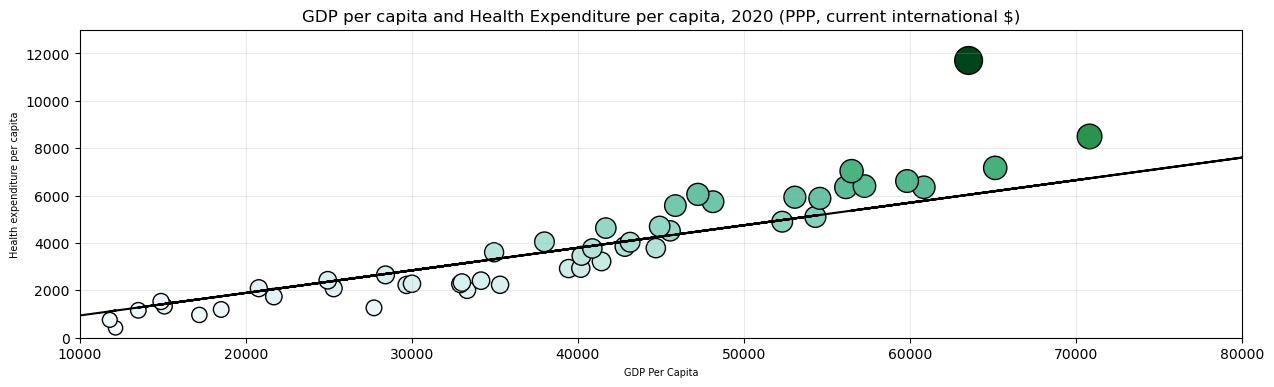

<Figure size 640x480 with 0 Axes>

In [13]:
# Scatter Plot : Gdp per Capita Vs. Health Expenditure per capita (PPP, current international $)

# Determine x & y values
x_values = gdp_health_df_2020['GDP per capita, PPP (current international $)']
y_values = gdp_health_df_2020['Current health expenditure per capita, PPP (current international $)']

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Color and sizees of data points
sizes = rounded_list
colors = rounded_list
# Figure size
plt.figure(figsize=(15,4))

# Scatter plot x & y values. Add aesthetics
plt.scatter(x_values,y_values, c= colors, cmap='BuGn', 
            s= sizes, edgecolor='black', linewidth= 1, alpha=1) 
plt.plot(x_values, regress_values, "k-")

# Set x & y limits
plt.xlim(10000, 80000)
plt.ylim(0, 13000)

# Set plot lables & title
plt.xlabel('GDP Per Capita', fontsize=7)
plt.ylabel('Health expenditure per capita', fontsize=7)
plt.title('GDP per capita and Health Expenditure per capita, 2020 (PPP, current international $)')
plt.grid(alpha=.25)
plt.show()
plt.savefig('Output/gdp_health_exp_scatter.pdf')



In [15]:
gdp_health_df_2020.head()

,Time,Country Name,Country Code,"GDP per capita, PPP (current international $)","Current health expenditure per capita, PPP (current international $)"
136,2020,India,IND,6517.761388,190.738255
137,2020,Indonesia,IDN,12160.716762,414.832493
146,2020,Peru,PER,11813.988436,753.304322
134,2020,China,CHN,17209.442954,962.288688
141,2020,South Africa,ZAF,13533.776252,1156.660954


In [24]:
mean_health = gdp_health_df_2020['Current health expenditure per capita, PPP (current international $)'].mean()
mean_gdp = gdp_health_df_2020['GDP per capita, PPP (current international $)'].mean()

# Scatter plot using plotly
fig = px.scatter(gdp_health_df_2020, x='GDP per capita, PPP (current international $)', y='Current health expenditure per capita, PPP (current international $)', 
                 color='GDP per capita, PPP (current international $)', size='GDP per capita, PPP (current international $)',
                 hover_data=['Country Name', 'GDP per capita, PPP (current international $)', 'Current health expenditure per capita, PPP (current international $)'],
                 title='GDP per capita and Health Expenditure per capita, 2020 (PPP, current international $)',
                 template='plotly_dark')

#labels={'life_expectancy': 'Life Expectancy'},
# Set ranges for y-axis and x-axis dynamically
y_range = [gdp_health_df_2020['GDP per capita, PPP (current international $)'].min(), gdp_health_df_2020['GDP per capita, PPP (current international $)'].max()]
x_range = [gdp_health_df_2020['Current health expenditure per capita, PPP (current international $)'].min(), gdp_health_df_2020['Current health expenditure per capita, PPP (current international $)'].max()]

# Add mean lines
fig.add_shape(dict(type='line', x0=mean_gdp, x1=mean_gdp,
                   y0=y_range[0], y1=y_range[1],
                   line=dict(color='red', dash='dash')))

fig.add_shape(dict(type='line', y0=mean_health, y1=mean_health,
                   x0=x_range[0], x1=x_range[1],
                   line=dict(color='blue', dash='dash')))
fig.update_layout(yaxis_range=[0,13000])

fig.update_layout(xaxis_title='GDP per capita',
                  yaxis_title='Health expenditure per capita')
# Show the plot
fig.show()


In [26]:
health = gdp_health_df_2020["Current health expenditure per capita, PPP (current international $)"]
gdp = gdp_health_df_2020["GDP per capita, PPP (current international $)"]

In [28]:
print(f"The correlation coefficient between Gdp Per Capita and Health Expenditure per Capita is {round(st.pearsonr(gdp,health)[0],2)}")

The correlation coefficient between Gdp Per Capita and Health Expenditure per Capita is 0.83
